### Builiding a Classification Model to predict the recurrence of Breast Cancer

#Task 1: Loading Data and Inspection

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/GSE2034_cleaned.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,relapse
0,3562.3,236.5,132.7,1625.7,43.8,768.5,200.1,33.5,1055.5,75.1,...,4455.7,372.2,101.4,170.7,316.9,211.4,175.8,27100.9,20624.7,0.0
1,3510.9,247.2,299.4,1896.1,87.8,686.4,133.9,25.3,652.7,76.8,...,4147.8,674.3,223.0,210.2,257.7,370.2,151.7,23840.3,20878.1,1.0
2,2974.8,178.7,333.7,1777.3,70.9,702.8,278.5,84.5,2938.0,61.9,...,8219.8,2066.6,887.3,543.3,1495.1,744.5,546.0,39540.0,35133.9,0.0
3,5559.6,210.1,389.1,1170.6,97.1,586.9,220.8,12.9,125.0,124.6,...,7653.5,477.2,370.1,297.1,626.8,211.1,264.9,35561.4,30938.2,1.0
4,4866.6,209.1,212.5,1893.3,93.8,911.3,190.5,17.8,8265.4,72.7,...,8523.1,711.2,625.2,376.6,1081.1,603.7,325.5,41311.2,38266.1,0.0


In [ ]:
print('Dataset shape:', df.shape)

Dataset shape: (285, 22284)


In [ ]:
expression_data = df.iloc[1:] # gene expression values
gene_ids = df.iloc[:,0] # gene IDs (probe IDs)

In [ ]:
expression_data

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,relapse
1,3510.9,247.2,299.4,1896.1,87.8,686.4,133.9,25.3,652.7,76.8,...,4147.8,674.3,223.0,210.2,257.7,370.2,151.7,23840.3,20878.1,1.0
2,2974.8,178.7,333.7,1777.3,70.9,702.8,278.5,84.5,2938.0,61.9,...,8219.8,2066.6,887.3,543.3,1495.1,744.5,546.0,39540.0,35133.9,0.0
3,5559.6,210.1,389.1,1170.6,97.1,586.9,220.8,12.9,125.0,124.6,...,7653.5,477.2,370.1,297.1,626.8,211.1,264.9,35561.4,30938.2,1.0
4,4866.6,209.1,212.5,1893.3,93.8,911.3,190.5,17.8,8265.4,72.7,...,8523.1,711.2,625.2,376.6,1081.1,603.7,325.5,41311.2,38266.1,0.0
5,4902.3,290.6,299.5,1170.5,83.1,677.6,134.2,12.8,952.8,53.5,...,6351.0,1096.4,622.9,277.7,639.9,572.5,382.4,31896.0,25484.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,3883.4,97.8,280.2,984.2,39.8,914.4,240.7,78.9,454.1,85.8,...,10188.0,638.9,352.4,286.5,792.1,418.2,439.7,50938.4,35174.0,0.0
281,1841.7,249.0,403.4,1087.1,101.0,632.0,236.9,33.8,2323.7,86.2,...,6797.7,857.1,541.9,570.4,1091.8,410.1,442.5,33069.3,29112.4,0.0
282,2147.5,134.0,409.7,778.8,9.0,865.6,159.0,38.5,2658.5,132.5,...,11112.0,843.3,386.5,503.2,785.7,437.9,758.3,51371.4,41214.8,0.0
283,2127.6,197.6,155.8,1083.7,12.4,820.3,162.8,17.9,1841.8,96.0,...,8568.1,556.1,272.1,264.2,630.6,293.0,341.9,40318.6,27715.6,0.0


In [ ]:
gene_ids

,1007_s_at
0,3562.3
1,3510.9
2,2974.8
3,5559.6
4,4866.6
...,...
280,3883.4
281,1841.7
282,2147.5
283,2127.6


##Task 2: Data Preprocessing

Removing Constant Features:

In [ ]:
# eliminate genes with no variance
const_features = df.columns[df.var()< 1e-10 ]
df.drop(const_features, axis=1, inplace=True)

Handling missing values:

In [ ]:
count_for_every_column = (df.isnull().sum())
missing_data_column = count_for_every_column[count_for_every_column > 0]
missing_data_column

,0


- Therefore, we know there is no missing data in all columns, probably because this is a cleaned dataset

In [ ]:
# separate the output(y = relapse) from the features( X= genes)
y = df['relapse'].copy()
X = df.drop('relapse', axis=1)

Normalization and Rescaling

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = np.log(X) # normalizing the dataset

In [ ]:
scaler = MinMaxScaler(feature_range=(0.001,0.999)) #rescales the dataset into the range of (0,1)

In [ ]:
X = scaler.fit_transform(X) # fit scaler and transform the data

In [ ]:
X = pd.DataFrame(X, columns=scaler.feature_names_in_) # to convert the dataset back into pd.Dataframe

## Task 3: Model Building

split the dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier # importing our machine learning model

Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5,10]
}

In [ ]:
# F1-score tuning
grid_search_f1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5 , scoring='f1')
grid_search_f1.fit(X_train, y_train)
print('Best parameters (F1):', grid_search_f1.best_params_)
print('Best F1-Score:', grid_search_f1.best_score_)

Best parameters (F1): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best F1-Score: 0.2523809523809524


In [ ]:
# Recall tuning
grid_search_recall = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='recall')
grid_search_recall.fit(X_train, y_train)
print('Best parameters (recall):', grid_search_recall.best_score_)
print('Best Recall:', grid_search_recall.best_score_)

Best parameters (recall): 0.17516339869281047
Best Recall: 0.17516339869281047


Train the model with the best hyperparameters:

In [ ]:
baseline_model= grid_search_f1.best_estimator_
baseline_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=42)

## Task 4: Model Evaluation

Evaluate the baseline_model which used hyperparameter tuning

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [ ]:
y_pred = baseline_model.predict(X_test)
tn , fp , fn , tp = confusion_matrix( y_test, y_pred).ravel()

In [ ]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp +fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
roc_auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:,1])

In [ ]:
# printing the metrics for the baseline model
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity):{recall:.2f}")
print(f"Specificity:{specificity:.2f}")
print(f"ROC-AUC Score:{roc_auc:.2f}")

Accuracy: 0.65
Precision: 0.57
Recall (Sensitivity):0.19
Specificity:0.92
ROC-AUC Score:0.63


Confusion Matrix Visualization:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

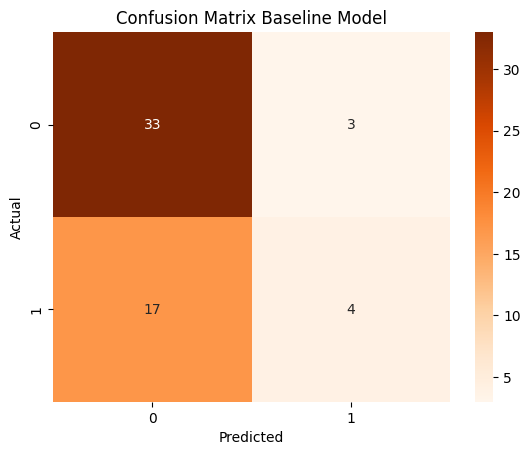

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Baseline Model")
plt.show()

## Task 5: Feature Selection 1; using PCA; Goal is to reduce dimensionality

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_components = 10
pca = PCA(n_components=n_components)

In [ ]:
pca.fit(X)

PCA(n_components=10)

In [ ]:
X_pca = pca.transform(X)

In [ ]:
pca_data = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}'for i in range(n_components)])
pca_data['relapse'] = y.copy()

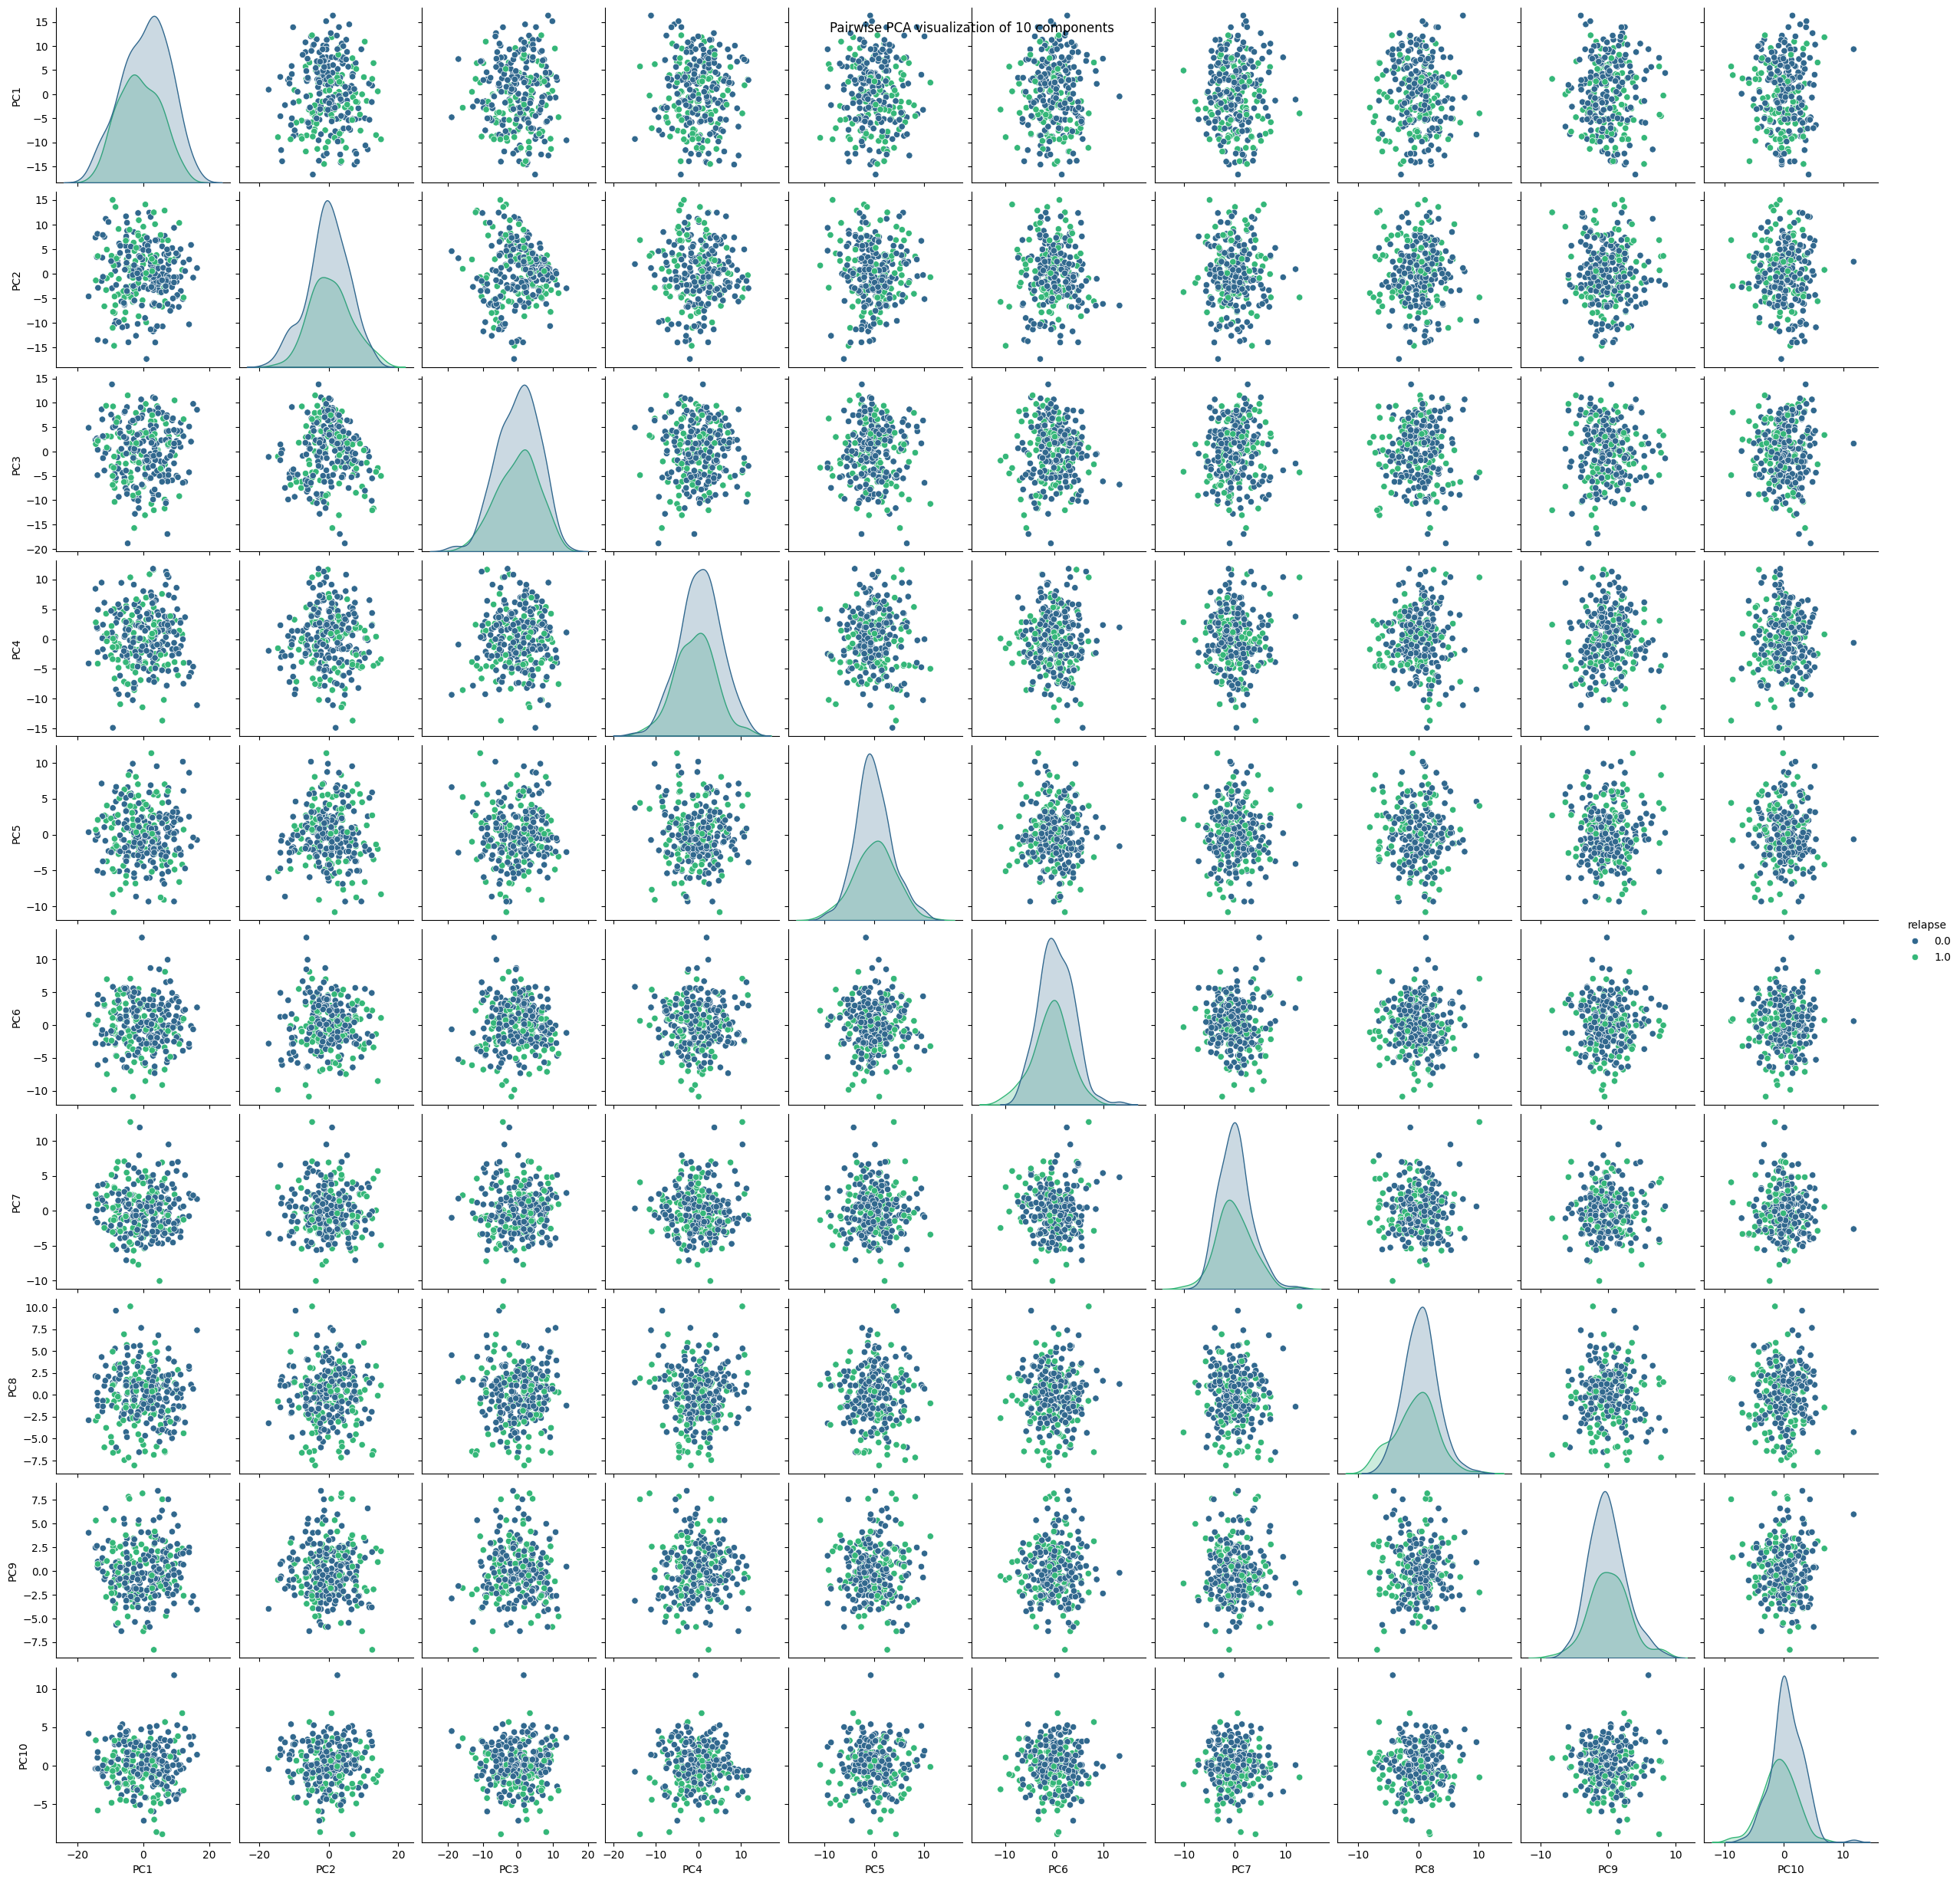

In [ ]:
sns.pairplot(pca_data, hue='relapse', palette='viridis')
plt.suptitle('Pairwise PCA visualization of 10 components')
plt.show()

In [ ]:
# selecting genes
loadings = abs(pca.components_)

selected_idx = []
for i in range(n_components):
  selected_idx.append(np.argmax(loadings[i]))

selected_genes = X.columns[selected_idx]

In [ ]:
selected_genes

Index(['207187_at', '205225_at', '205225_at', '212713_at', '202379_s_at',
       '206296_x_at', '208772_at', '200937_s_at', '216836_s_at',
       '202018_s_at'],
      dtype='object')

In [ ]:
df_feature_selection_1 = df[selected_genes]

In [ ]:
# spliting data into training and testing data

X_train_1, X_test_1, y_train_1 , y_test_1 = train_test_split( df_feature_selection_1, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train_1.shape # ensuring the sample size is the same for X_train and y_train

(228, 10)

In [ ]:
y_train_1.shape

(228,)

In [ ]:
y_test_1.shape # ensuring the sample size is the same for the X_test and y_test

(57,)

In [ ]:
X_test_1.shape

(57, 10)

In [ ]:
# training model_1

model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train_1, y_train_1)

RandomForestClassifier(random_state=42)

In [ ]:
# evaluation of model
y_pred_1 = model_1.predict(X_test_1)
tn , fp , fn , tp = confusion_matrix( y_test_1, y_pred_1).ravel()


accuracy_1 = (tp + tn) / (tp + tn + fp + fn)
precision_1 = tp / (tp +fp)
recall_1 = tp / (tp + fn)
specificity_1 = tn / (tn + fp)
roc_auc_1 = roc_auc_score(y_test_1, model_1.predict_proba(X_test_1)[:,1])

In [ ]:
# printing the metrics for the feature selection model 1
print(f"Accuracy: {accuracy_1:.2f}")
print(f"Precision: {precision_1:.2f}")
print(f"Recall (Sensitivity):{recall_1:.2f}")
print(f"Specificity:{specificity_1:.2f}")
print(f"ROC-AUC Score:{roc_auc_1:.2f}")

Accuracy: 0.65
Precision: 0.55
Recall (Sensitivity):0.29
Specificity:0.86
ROC-AUC Score:0.60


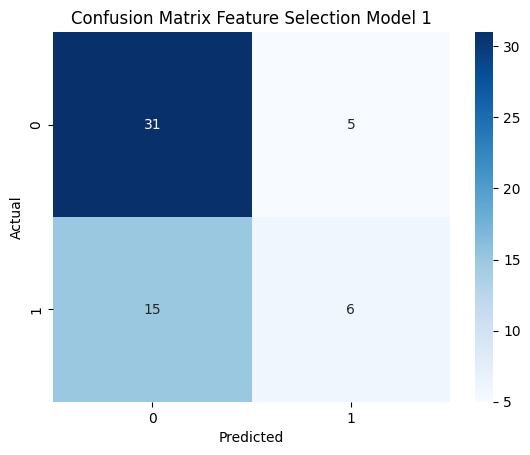

In [ ]:
# confusion matrix for Feature selection model 1
cm = confusion_matrix(y_test_1, y_pred_1)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Feature Selection Model 1")
plt.show()

## Task 6: Feature Selection 2; using Lasso Regression; goal is to reduce dimensionality with another method

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lasso = LogisticRegression(penalty='l2', max_iter=1000)
lasso.fit(X, y)

LogisticRegression(max_iter=1000)

In [ ]:
# Get the genes with the highest absolute coefficient

feature_names = lasso.feature_names_in_
coefficients = abs(lasso.coef_)
selected_genes_2 = []


for i in range(n_components):
  idx = np.argmax(coefficients)
  selected_genes_2.append(feature_names[idx])
  feature_names = np.delete(feature_names, idx)
  coefficients = np.delete(coefficients, idx)

In [ ]:
selected_genes_2

['220382_s_at',
 '201178_at',
 '205655_at',
 '217126_at',
 '220656_at',
 '207850_at',
 '210019_at',
 '220256_s_at',
 '211803_at',
 '215211_at']

In [ ]:
df_feature_selection_2 = df[selected_genes_2]

In [ ]:
df_feature_selection_2 # seeing the datafile with the related genes

,220382_s_at,201178_at,205655_at,217126_at,220656_at,207850_at,210019_at,220256_s_at,211803_at,215211_at
0,102.0,2588.3,18.1,7.2,16.3,47.6,23.7,21.2,14.6,32.9
1,59.5,2470.1,4.1,8.1,10.2,10.7,89.4,45.2,57.8,186.1
2,71.3,3006.2,8.9,4.6,33.4,48.6,21.0,26.8,80.5,30.3
3,17.3,1786.7,36.4,51.9,0.9,12.2,63.6,101.3,18.8,23.8
4,89.0,2532.2,2.6,3.6,22.4,25.1,12.5,36.5,102.6,237.5
...,...,...,...,...,...,...,...,...,...,...
280,205.1,2956.5,58.8,91.8,22.5,133.4,27.2,75.5,48.6,413.1
281,149.7,3046.7,15.0,20.6,3.2,207.3,38.3,25.7,44.2,142.5
282,122.6,2225.7,47.0,4.0,26.4,6.4,125.5,39.9,72.6,129.0
283,70.6,2606.8,24.5,9.6,1.2,133.7,83.7,36.5,70.9,25.0


In [ ]:
# splitting data into training and testing datasets

X_train_2 , X_test_2 , y_train_2, y_test_2 = train_test_split(df_feature_selection_2, y, test_size=0.2 , random_state=42, stratify=y)

In [ ]:
X_train_2.shape # validate the sample size is the same for X_train and y_train

(228, 10)

In [ ]:
y_train_2.shape

(228,)

In [ ]:
X_test_2.shape # validate the sample size is the same for X_test and y_test

(57, 10)

In [ ]:
y_test_2.shape

(57,)

In [ ]:
# training the feature selection model 2

model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_train_2, y_train_2)

RandomForestClassifier(random_state=42)

In [ ]:
# evaluate the feature selection model 2

y_pred_2 = model_2.predict(X_test_2)
tn , fp , fn , tp = confusion_matrix( y_test_2, y_pred_2).ravel()


accuracy_2 = (tp + tn) / (tp + tn + fp + fn)
precision_2 = tp / (tp +fp)
recall_2 = tp / (tp + fn)
specificity_2 = tn / (tn + fp)
roc_auc_2 = roc_auc_score(y_test_2, model_2.predict_proba(X_test_2)[:,1])


In [ ]:
# printing the metrics for feature selection model 2
print(f"Accuracy: {accuracy_2:.2f}")
print(f"Precision: {precision_2:.2f}")
print(f"Recall (Sensitivity):{recall_2:.2f}")
print(f"Specificity:{specificity_2:.2f}")
print(f"ROC-AUC Score:{roc_auc_2:.2f}")

Accuracy: 0.77
Precision: 0.83
Recall (Sensitivity):0.48
Specificity:0.94
ROC-AUC Score:0.82


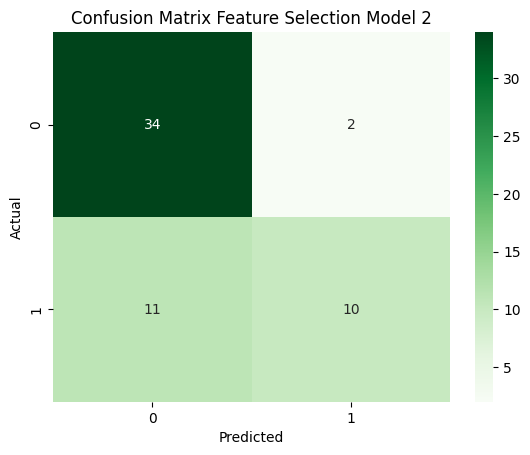

In [ ]:
# confusion matrix for Feature selection model 2
cm = confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Feature Selection Model 2")
plt.show()

## Task 7: Biological Interpretation

For feature selection model 1: the top genes selected are;

'207187_at', '205225_at', '205225_at', '212713_at', '202379_s_at',
       '206296_x_at', '208772_at', '200937_s_at', '216836_s_at',
       '202018_s_at'

Out of these genes,

- **205225_at** corresponds to ESR1 gene, involved in cell growth and differentiation in response to estrogen

- **212713_at** corresponds to MFAP4 gene; encodes microfibrillar-associated protein

- **216836_s_at**  corresponds to ERBB2 gene; encodes human epidermal growth factor 2 (HER2); involved in cell signalling pathways that regulate cell growth and profileration in breast cancer





For feature selection model 2: the top genes selected are;

'220382_s_at',201178_at','205655_at','217126_at','220656_at','207850_at','210019_at','220256_s_at','211803_at','215211_at'

Out of these genes,
- **201178_at** corresponds to the FBX07 gene, the protein it encodes plays a role in cell cycle regulation and apoptosis
- **207850_at** corresponds to the CXCL3 gene, which encodes a chemokine involved in immune responses


## Discussion: Performance of different models

Train dataset with/without feature selection:

Basic_model which was trained without any feature selection:
- Accuracy: 0.65
- Precision: 0.57
- Recall (Sensitivity): 0.19
- Specificity: 0.92
- ROC-AUC Score: 0.63




Feature_selection_model_1;
- Accuracy: 0.65
- Precision: 0.55
- Recall (Sensitivity): 0.29
- Specificity: 0.86
- ROC-AUC Score:  0.60


Feature_selection_model_2;
- Accuracy: 0.77
- Precision: 0.83
- Recall (Sensitivity): 0.48
- Specificity: 0.94
- ROC-AUC Score: 0.82



Based on the metrics of these 3 models; we can conclude that the
Feature Selection 2 model which used the Lasso Regression is the best model, performing better than the other 2 models in all metrics.

In order to improve this model,
we can retrain the model with better data, perhaps increase the sample size.

How can we validate these findings biologically? qPCR or functional assays

-  We can utilise functional assays
and CRISPR-CAS9 to knock out the genes that we identified in our machine learning model to try to study their role in breast cancer development.



In [ ]:
%%shell
jupyter nbconvert --to html "/content/PBL04_BIOF2001_Bisht_Ananya.ipynb"

[NbConvertApp] WARNING | pattern '/content/PBL04_BIOF2001_Bisht_Ananya.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answe

CalledProcessError: Command 'jupyter nbconvert --to html "/content/PBL04_BIOF2001_Bisht_Ananya.ipynb"
' returned non-zero exit status 255.